# Project: Investigate a Dataset - Patients No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and trim & clean the dataset for analysis.
### General Properties

In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
#exploring the shape of data
df.shape

(110527, 14)

Data Consist of 110527 rows (appointments) and 14 columns

In [29]:
# Checking for dupliactes
df.duplicated().sum()

0

No Duplicates in this dataset

In [30]:
# Check for unique values
df['PatientId'].nunique()

62299

There's only 62299 unique patients out of 110527

In [31]:
# Checking if there's duplicatrion between Patients Id & No-Show

df.duplicated(['PatientId', 'No-show']).sum()

38710

There's 38710 duplicates, we'll remove them in the cleaning stage

In [32]:
# Checking if there's any missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Luckily, there's no missing data :))

In [33]:
# Let's get some insights about our dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


So, according to our data: 

• Minimum age = -1 (Probably a mistake which will not affect our analysis as it's only one value as shown in the next cell, so I'll remove it in the next phase) 

• Maximum age = 115

• Average Age : 37

• No patients have Diabetes, Alcoholism

In [34]:
# Identifying the patient whose age is -1
patient=df.iloc[98832]
patient

PatientId            822145925426128.0
AppointmentID                  5789400
Gender                               M
ScheduledDay      2016-06-08T14:56:42Z
AppointmentDay    2016-06-08T00:00:00Z
Age                                 38
Neighbourhood                 REDENÇÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Name: 98832, dtype: object

This is the row having a patient whose age is -1, it will be removed in the cleaning process.



### Data Cleaning

In [35]:
# Removing the patient whose age is -1
df.drop(index=99832,inplace=True)


In [36]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [37]:
# let's correct some columns naming

df.rename(columns={'Hipertension':'Hypertension',
                  'No-show':'No_show',
                  'Handcap':'Handicaped'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicaped,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 

In [38]:
# Removing duplicates between Patients ID & No Show if they have the same values, while ignoring duplicates if they 
# differ in showing status

df.drop_duplicates(['PatientId', 'No_show'], inplace=True)
df.shape

(71816, 14)

In [39]:
# Removing data that is unsued in my analysis

df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicaped,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Wrangling Summary

In this section, we loaded our data from the csv file, created General properities section to discover some genreal infos about the dataset. Then, we started cleaning our dataset by dropping the row which have age = -1, and dropping the columns which we'll not use in our analysis.

## Exploratory Data Analysis

Now that we've cleaned our data, let's explore it.

### General Look

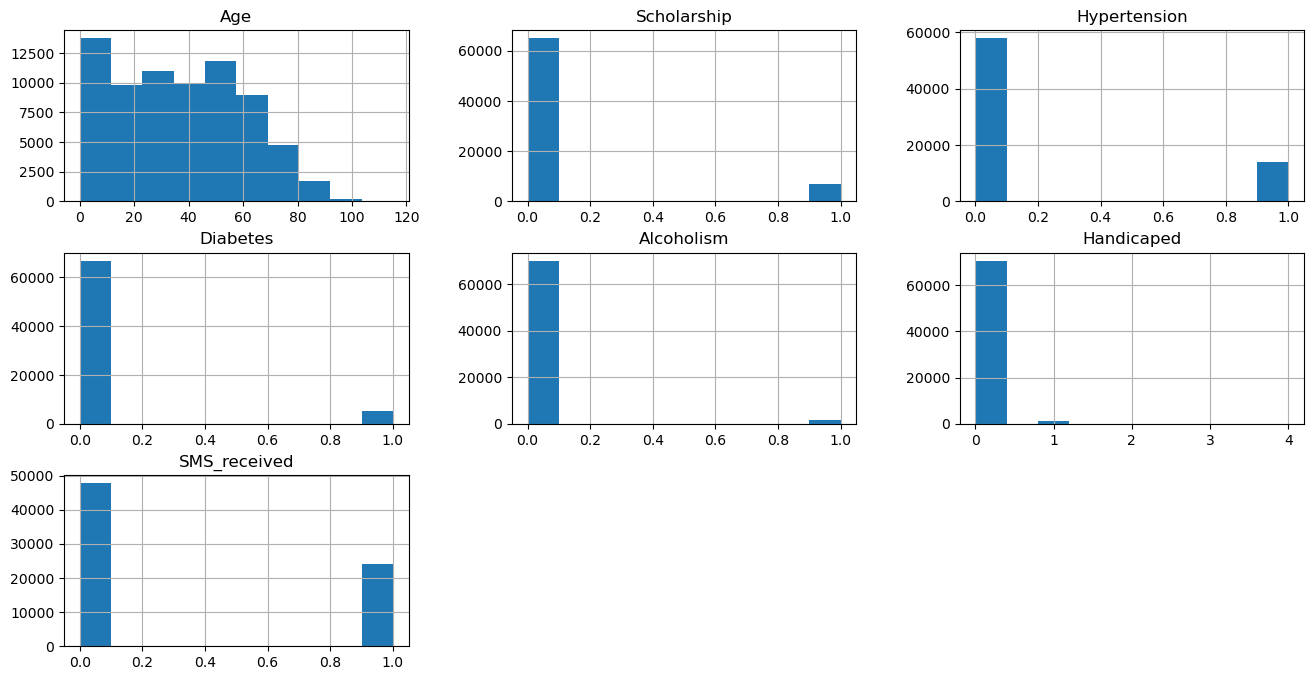

In [40]:
df.hist(figsize=(16,8));

#### Q1: How many patients showed to their appointments & how many didn't? 

In [41]:
# Dividing the pateints into two groups by their show status

show = df.No_show=='No'
noshow = df.No_show=='Yes'
df[show].count(),df[noshow].count()

show

0         True
1         True
2         True
3         True
4         True
          ... 
110518    True
110520    True
110521    True
110522    True
110524    True
Name: No_show, Length: 71816, dtype: bool

According to the above analysis, There's 54,153 patients attended their appointments (Show) & 17,663 patients didn't attend (No show). 

The number of patients who attended their appointments is almost 3 times greater than who didn't.

#### Q2: What are the mean age of the two groups? 

In [42]:
df[show].mean(),df[noshow].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_4360\3233283171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[show].mean(),df[noshow].mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handicaped       0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handicaped       0.017777
 SMS_received     0.453094
 dtype: float64)

According to the above analysis, The mean age of the "**show**" group = 37 & the mean age of the "**no show**" group = 34.

And looks like we have a problem in SMS, as the number of patients who received SMS and didn't attend their appointments are almost 1.5 more than who received and attended.


## Factors influencing the attendance.

#### Q3: Does age influence the attendance? 

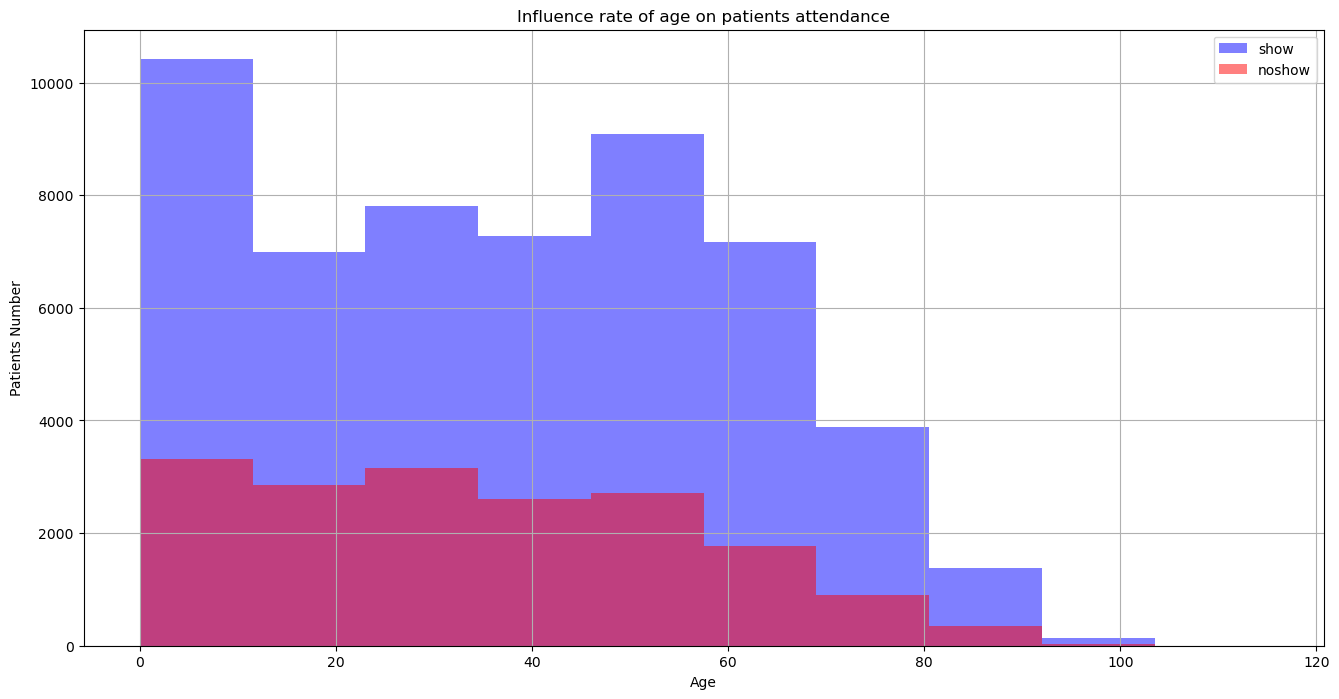

In [43]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,8]);
    df[col_name][show].hist(alpha=.5, bins=10, color= 'blue', label='show');
    df[col_name][noshow].hist(alpha=.5, bins=10, color= 'red', label='noshow');
    plt.legend();
    plt.title('Influence rate of age on patients attendance')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df, 'Age', show, noshow)

According to the above chart: 

• The most showing age:

   1- The age between 0 - 10 (Maybe parents taking care of their children)
   
   2- Middle age (age between 45 - 55).

• After the age of 65 patients tend to not showing to their appointments.

#### Q4: Does chronic deseases  & age affect the attendamce of the patients? 

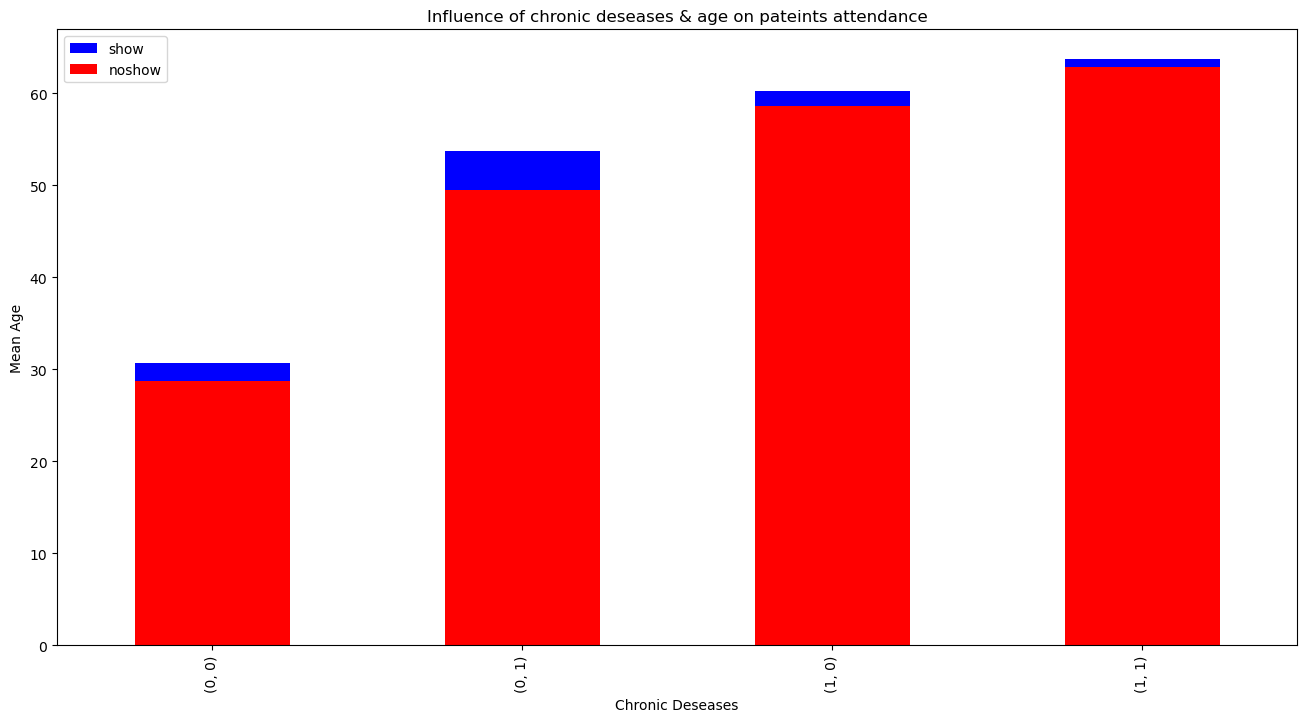

In [44]:
plt.figure(figsize=[16,8])
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='blue', label='show');
df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color = 'red', label='noshow');
plt.legend();
plt.title('Influence of chronic deseases & age on pateints attendance');
plt.xlabel('Chronic Deseases');
plt.ylabel('Mean Age');

In [45]:
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'], df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

From the above chart we can conclude that there's a correlation between the age and chronic deseases, as the age increases, the chronic deseases increases. 

However, this relationship doesn't affect the rate of attendance of patients.

#### Q5: Does the gender affect the attendance? 

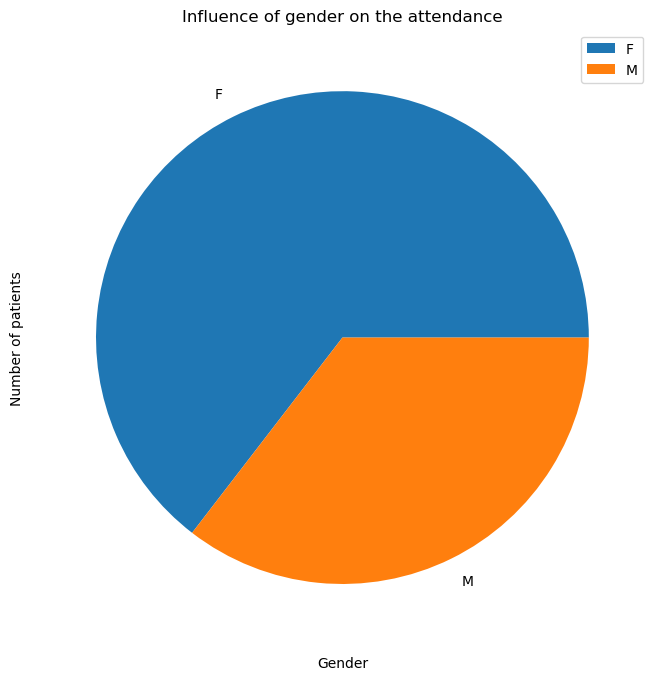

In [46]:
 def attendance(df,col_name,attended,absent): 
        plt.figure(figsize=[16,8]);
        df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
        plt.legend();
        plt.title('Influence of gender on the attendance')
        plt.xlabel('Gender');
        plt.ylabel('Number of patients');
attendance(df,'Gender',show,noshow)

From the above pie chart we could conclude that the number of attended females is so much bigger than the number of attended males.

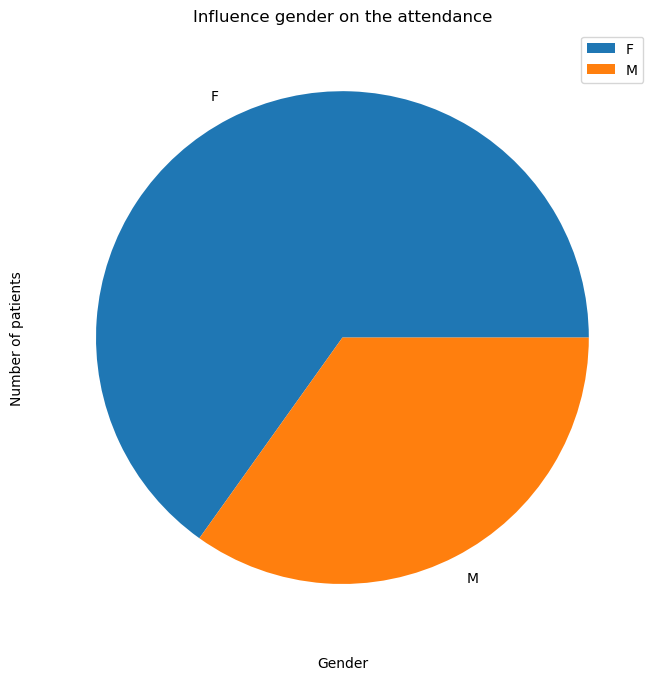

In [47]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,8])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='noshow');
    plt.legend();
    plt.title('Influence gender on the attendance')
    plt.xlabel('Gender');
    plt.ylabel('Number of patients');
attendance(df,'Gender',show,noshow)

From the above pie chart we could conclude that - again - the number of female who didn't attend their appointments is much bigger than the number of males who didn't attend.

From the above two pie charts it's clear that the gender has no effect the attendance of the patients.

#### Q6: Does receiving SMS has a direct effect on attendance? 

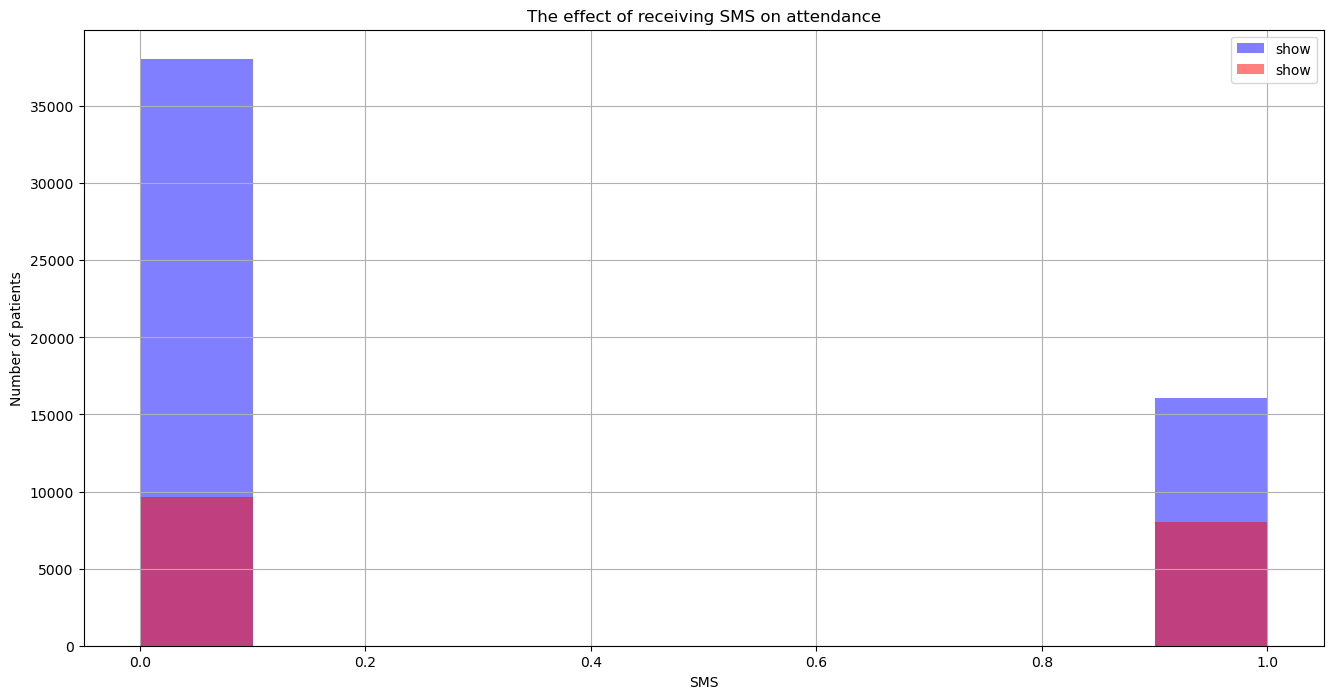

In [51]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,8]);
    df[col_name][show].hist(alpha=0.5, bins=10, color='blue', label='show');
    df[col_name][noshow].hist(alpha=0.5,bins=10,color='red',label='show');
    plt.legend();
    plt.title('The effect of receiving SMS on attendance');
    plt.xlabel('SMS');
    plt.ylabel('Number of patients');
attendance(df,'SMS_received',show,noshow)

From the above chart we could conclude that the number of showing patients without receiving an SMS is greater than the number of showing pateients after receiving an SMS. This could be an index that we have a problem with our SMS campaign. 

#### Q7: Does neighbourhood has a direct effect on attendance?  

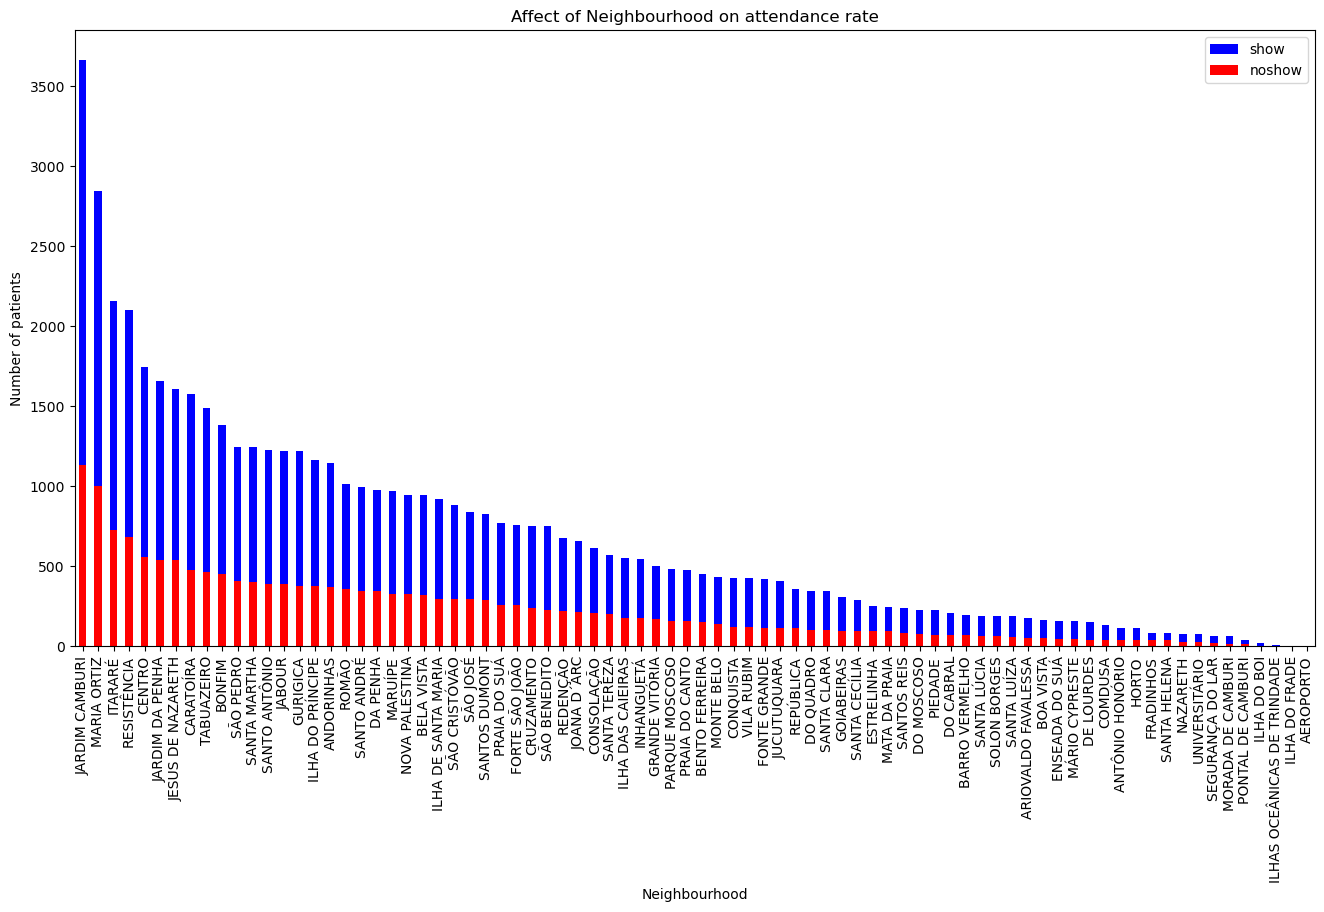

In [53]:
plt.figure(figsize=[16,8]);
df.Neighbourhood[show].value_counts().plot(kind='bar', color='blue', label='show');
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow');
plt.legend();
plt.title('Affect of Neighbourhood on attendance rate')
plt.xlabel('Neighbourhood');
plt.ylabel('Number of patients');

According to the above chart, we could conclude that the neighbourhood has a direct effect on attendance rate. 

According to this chart, the neighbourhood **Jardim Camburi** has the largest attendance rates in comarison with the other neighbourhoods. 

#### Q8: Is there any indirect effect in addition to neighbourhood that affect the attendance? 

 Let's try the SMS received by the patients.

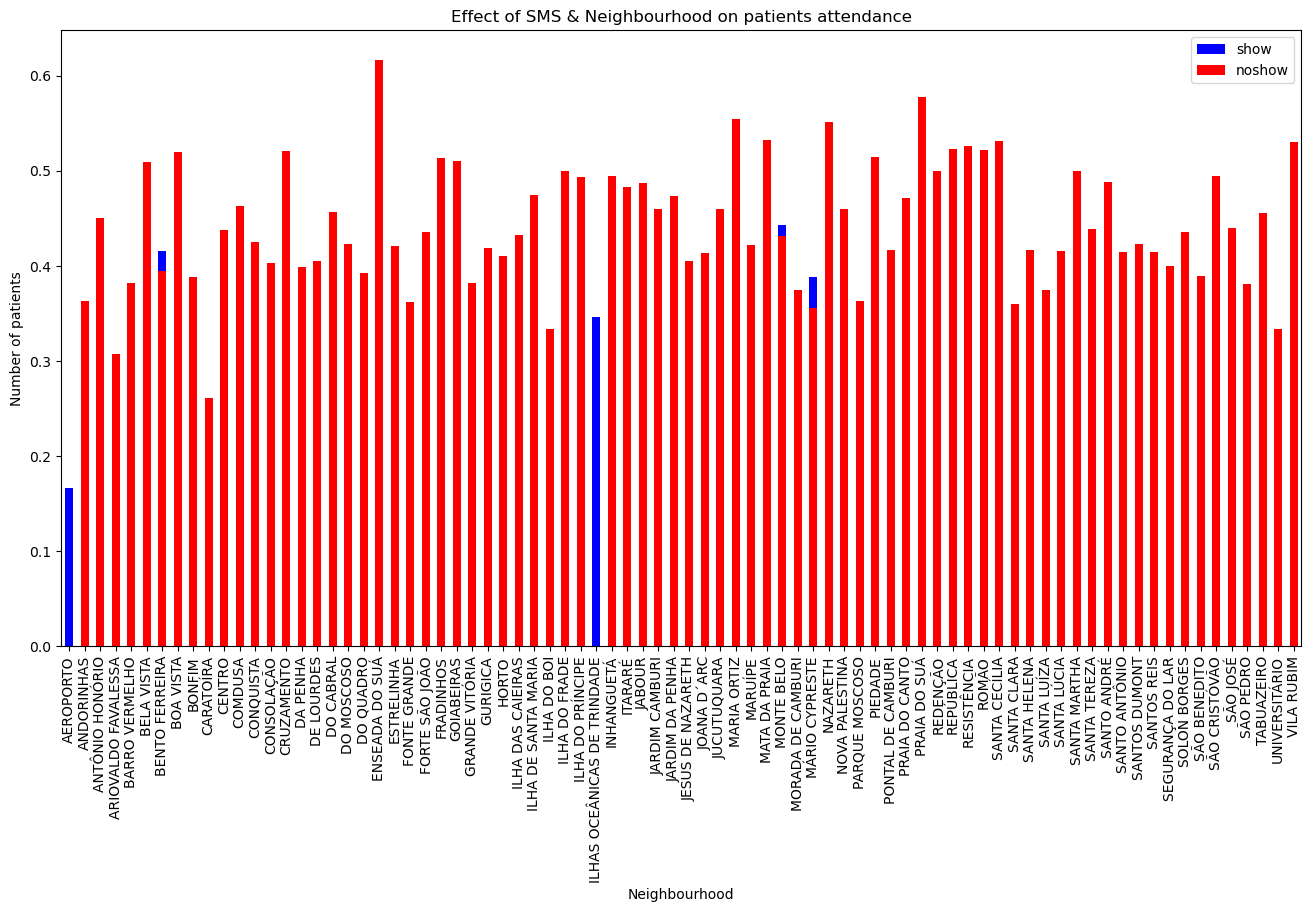

In [57]:
plt.figure(figsize=[16,8]);
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show');
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='red', label='noshow');
plt.legend();
plt.title('Effect of SMS & Neighbourhood on patients attendance');
plt.xlabel('Neighbourhood');
plt.ylabel('Number of patients');

From the above chart, we could conclude that patients who received an SMS attended their appointments in only 5 neighbourhoods & the most responsive neighbourhood is **Ilhas Oceanicas de Trindade**

<a id='conclusions'></a>
## Conclusions



### Finally to summarize our work: 

• Number of patients who attended their appointments is 3x bigger than the number of patients who didn't attend.

• Number of patients who received an SMS and didn't attend their appointments is almost 1.5x bigger than who received an SMS and attended their appointments.

• The age between 0 - 10 & 45 - 55 are the most showing age range, and after the age of 65 patients tend to not attending their appointments.

• Neighbourhood has a direct influence on patients attendance rate.

#### Limitations: 

We couldn't find any influence of Gender & Chronic Deseases on the attendance rate.